# Import Required Libraries

In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

In [2]:
# Define paths
data_dir = "E:/Imarticus PG Data science class/CP2/Drowsiness Detection Project/Dataset/"
categories = ["open_eyes", "closed_eyes"]

# Data Preprocessing

In [3]:
# Image size
IMG_SIZE = (64, 64)

In [4]:
import cv2

In [5]:
def load_data():
    data = []
    labels = []

    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)  # 0 for open, 1 for closed

        for img in os.listdir(path):
            img_array = plt.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, IMG_SIZE)  # Resize to (64, 64)
            data.append(img_resized)
            labels.append(class_num)

    return np.array(data), np.array(labels)


# Creating X and Y

In [6]:
X, y = load_data()

In [160]:
X

array([[[0.18391737, 0.18988971, 0.19215687, ..., 0.35520837,
         0.35764688, 0.35741422],
        [0.1764706 , 0.18963121, 0.19381128, ..., 0.36458528,
         0.3664455 , 0.36267138],
        [0.17420344, 0.1881137 , 0.19525985, ..., 0.36432102,
         0.3719363 , 0.36288777],
        ...,
        [0.23856083, 0.25355488, 0.25813228, ..., 0.2933431 ,
         0.30968234, 0.3161554 ],
        [0.23976716, 0.24644609, 0.2580892 , ..., 0.28909412,
         0.30030638, 0.30840707],
        [0.24024108, 0.24981618, 0.26262257, ..., 0.29534313,
         0.29954717, 0.3019608 ]],

       [[0.11476716, 0.12271609, 0.12444854, ..., 0.34613973,
         0.3458264 , 0.34607053],
        [0.11455964, 0.11906619, 0.11868466, ..., 0.3555413 ,
         0.3512047 , 0.35377532],
        [0.11164216, 0.11815569, 0.1220009 , ..., 0.3655501 ,
         0.35839054, 0.3565128 ],
        ...,
        [0.15373775, 0.1751532 , 0.19994903, ..., 0.28674772,
         0.30226716, 0.3164345 ],
        [0.1

In [161]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [162]:
X.shape

(1018, 64, 64)

In [163]:
y.shape

(1018,)

## Normalize the image data

In [7]:
# Normalize the image data
X = X / 255.0

In [165]:
X

array([[[0.00072124, 0.00074467, 0.00075356, ..., 0.00139297,
         0.00140254, 0.00140162],
        [0.00069204, 0.00074365, 0.00076004, ..., 0.00142975,
         0.00143704, 0.00142224],
        [0.00068315, 0.0007377 , 0.00076572, ..., 0.00142871,
         0.00145857, 0.00142309],
        ...,
        [0.00093553, 0.00099433, 0.00101228, ..., 0.00115037,
         0.00121444, 0.00123983],
        [0.00094026, 0.00096646, 0.00101211, ..., 0.0011337 ,
         0.00117767, 0.00120944],
        [0.00094212, 0.00097967, 0.00102989, ..., 0.00115821,
         0.00117469, 0.00118416]],

       [[0.00045007, 0.00048124, 0.00048803, ..., 0.00135741,
         0.00135618, 0.00135714],
        [0.00044925, 0.00046693, 0.00046543, ..., 0.00139428,
         0.00137727, 0.00138735],
        [0.00043781, 0.00046336, 0.00047843, ..., 0.00143353,
         0.00140545, 0.00139809],
        ...,
        [0.00060289, 0.00068688, 0.00078411, ..., 0.0011245 ,
         0.00118536, 0.00124092],
        [0.0

# Train-validation-test split (splitting data in 3 sets)

In [8]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Reshape images for CNN input (grayscale images, single channel)
X_train = X_train.reshape(-1, 64, 64, 1)
X_val = X_val.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

In [168]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(712, 64, 64, 1)
(712,)
(153, 64, 64, 1)
(153,)


In [169]:
print(X_test.shape)
print(y_test.shape)

(153, 64, 64, 1)
(153,)


In [170]:
y_train

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

# Building a CNN (Convolutional Neural Network) model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# we have already loaded and preprocessed your data
# X is your input data, y is your labels
# X should have shape (num_samples, img_height, img_width, num_channels)
# y should be binary (0 for closed eyes, 1 for open eyes)

# Example dataset shape after preprocessing
# X_train, X_test, y_train, y_test are the split datasets for training and testing

## Define Model Architecture

In [11]:
# Model Architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Grayscale images
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout to reduce overfitting
model.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# view model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 580,289 (2.21 MB)

 Trainable params: 580,289 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.4991 - loss: 0.6936 - val_accuracy: 0.4510 - val_loss: 0.6934
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5501 - loss: 0.6931 - val_accuracy: 0.5490 - val_loss: 0.6928
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.4510 - val_loss: 0.6936
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5019 - loss: 0.6931 - val_accuracy: 0.4510 - val_loss: 0.6936
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4837 - loss: 0.6934 - val_accuracy: 0.4510 - val_loss: 0.6934
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5348 - loss: 0.6929 - val_accuracy: 0.4510 - val_loss: 0.6937
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5049 - loss: 0.6930 - val_accuracy: 0.4510 - val_loss: 0.6937
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4956 - loss: 0.6930 - val_accuracy: 0.4510 - 

# Evaluate the model on validation data

In [15]:
# Evaluate the model - validation accuracy and loss
model.evaluate(X_val, y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4437 - loss: 0.6936


[0.6935809850692749, 0.45098039507865906]

### Insights
- Poor performance low accuracy for validation data as well as training data

In [16]:
# Training accuracy and loss
model.evaluate(X_train, y_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4947 - loss: 0.6932


[0.6931444406509399, 0.5014045238494873]

# Training & Validation Loss plotted against number of Epochs

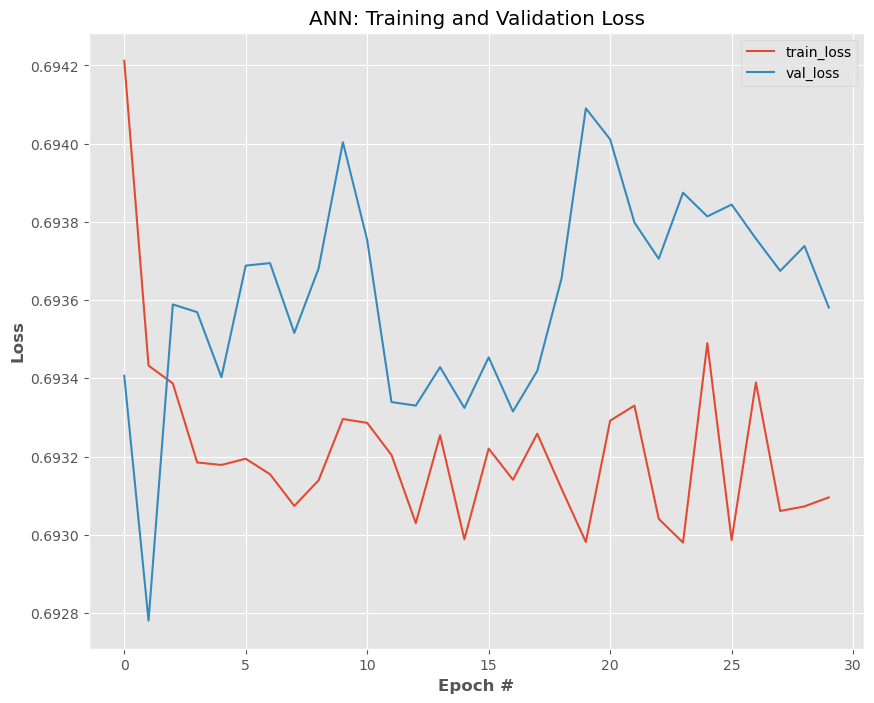

In [20]:
N= np.arange(0,30)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['loss'],label='train_loss')
plt.plot(N,history.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show();

### Insights
- A good model should have a smooth decreasing training loss and a close by decreasing validation loss
- A good model should have less fluctuations
- In the following model has lot of fluctuations in train and validation loss, thus not a optimal model we need to tune the model to improve performance

# Training & Validation Accuracy plotted against number of Epochs

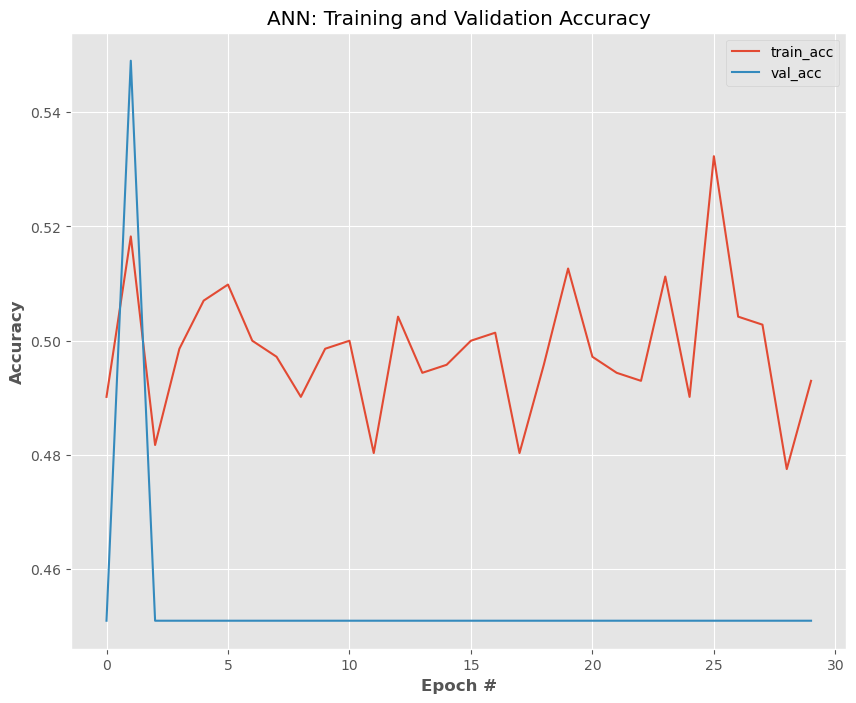

In [21]:
N= np.arange(0,30)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['accuracy'],label='train_acc')
plt.plot(N,history.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

### Insights
- A good model should have a smooth increasing training accuracy and a close by increasing validation accuracy values
- A good model should have less fluctuations
- In the following model validation accuracy is constant and a not a smooth increasing curve in train and validation accuracy, thus not a optimal model we need to tune the model to improve performance
- there are high fluctuations in validation accuracy so not a suitable model

# Prediction on test data using CNN model

In [22]:
y_pred= model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


# Evaluate the model on test data (unseen data)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
# Since the output is probabilistic, use a threshold to convert to binary (0 or 1)
y_pred = np.round(y_pred).astype(int)  # Convert to 0s and 1s based on a threshold of 0.5

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[ 0 70]
 [ 0 83]]


In [24]:
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.54      1.00      0.70        83

    accuracy                           0.54       153
   macro avg       0.27      0.50      0.35       153
weighted avg       0.29      0.54      0.38       153

Accuracy of the model:  0.5424836601307189


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Insights:
- The model is predicting all the images as Class 1 means as closed eyes which is incorrect.
- The Class 0 has 0 recall, thus there is a need to tune the model as model is learning on only Class 1

# Tunning the model
### testing all the below steps to get optimal model
1. step 1 - increase dataset size from 224 images of each class to 509 images of each class total 1018 images
2. step 2 - adding padding to convolutional layer to avoid shrinkage of image
- still no improvement
3. Step 3- image size changed to 80,80
4. Step 4- SMOTE upsampling minority class
5. Step 5- balance weights assigned to each class while training
- trying all approached on the below model by editing code
### Trying to handle underfitting
6. Step 6- reduce to learning rate from 0.001 to 0.0001
7. Step 7- increased epochs from 30 to 50

## Increased dataset size and reloaded X and Y

In [30]:
# Image size
IMG_SIZE = (80, 80)

In [31]:
X1, y1 = load_data()

In [32]:
print(X1.shape)
print(y1.shape)

(1018, 80, 80)
(1018,)


## Normalize the image data

In [33]:
# Normalize the image data
X1 = X1 / 255.0

# Train-validation-test split (splitting data in 3 sets)

In [34]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)

# Preprocessing

In [41]:
# Reshape images for CNN input (grayscale images, single channel)
X_train1 = X_train1.reshape(-1, 80, 80, 1)
X_val1 = X_val1.reshape(-1, 80, 80, 1)
X_test1 = X_test1.reshape(-1, 80, 80, 1)

In [42]:
print(X_train1.shape)
print(y_train1.shape)
print(X_val1.shape)
print(y_val1.shape)

(712, 80, 80, 1)
(712,)
(153, 80, 80, 1)
(153,)


In [43]:
print(X_test1.shape)
print(y_test1.shape)

(153, 80, 80, 1)
(153,)


# Define CNN Model Architechure

## Model Tunning techniques:

## Adding Padding to Convolutional Layer to avoid shrinkage of image
- There are two common types of padding:

1. 'valid' padding (no padding): The feature map size reduces after each convolution.
2. 'same' padding (zero padding): The output size remains the same as the input size.

- By specifying padding='same', the output of the convolution will have the same width and height as the input. This is achieved by adding zero-padding to the input feature map so that after the convolution, the spatial dimensions are preserved.
- In contrast, padding='valid' (the default) will perform convolution without any padding, leading to smaller output feature maps.

In [134]:
# Model Architecture
model1 = Sequential()

# 1st Convolutional Layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1), padding='same'))  # Grayscale images
model1.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model1.add(Flatten())

# Fully connected layer
model1.add(Dense(128, activation='relu'))
# Dropout to reduce overfitting
#model1.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model1.add(Dense(1, activation='sigmoid'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model
- Decrease the learning rate (0.0001) to overcome underfitting (tunning model steps)

In [135]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 80, 80, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 40, 40, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 847,521 (3.23 MB)

 Trainable params: 847,521 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

## ModelTunning technique 2 - Oversampling using SMOTE to bring training data labels in balance

In [78]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Reshape 4D array (num_samples, height, width, channels) to 2D array (num_samples, height*width*channels)
num_samples, height, width, channels = X_train1.shape
X_train1_reshaped = X_train1.reshape(num_samples, height * width * channels)

# Apply SMOTE to the reshaped data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train1_reshaped, y_train1)

# Reshape back to 4D array (num_samples_resampled, height, width, channels)
num_samples_resampled = X_train_resampled.shape[0]
X_train_resampled = X_train_resampled.reshape(num_samples_resampled, height, width, channels)

## Model Tunning technique 3

## Calculate class weights to handle class imbalance by balancing both the classes weights while training the model

In [79]:
from sklearn.utils import class_weight

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes=np.unique(y_train_resampled), 
                                                  y=y_train_resampled)

# Train the model

## Model Tunning technique 3 for underfitting model
- Decrease the learning rate (0.0001)
- increase number of epochs to increase accuracy

In [137]:
# Train the model
history1 = model1.fit(X_train_resampled, y_train_resampled, epochs=80, validation_data=(X_val1, y_val1), batch_size=32,
                      class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.5190 - loss: 0.6931 - val_accuracy: 0.5490 - val_loss: 0.6929
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4949 - loss: 0.6931 - val_accuracy: 0.5490 - val_loss: 0.6923
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4999 - loss: 0.6931 - val_accuracy: 0.5490 - val_loss: 0.6921
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4859 - loss: 0.6932 - val_accuracy: 0.5490 - val_loss: 0.6920
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5179 - loss: 0.6925 - val_accuracy: 0.5490 - val_loss: 0.6915
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4951 - loss: 0.6929 - val_accuracy: 0.5490 - val_loss: 0.6919
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4921 - loss: 0.6922 - val_accuracy: 0.5490 - val_loss: 0.6900
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4978 - loss: 0.6906 - val_accuracy: 0.5621 - 

# Evaluate the model on validation data

In [138]:
# Evaluate the model
model1.evaluate(X_val1, y_val1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8939 - loss: 0.2589


[0.28852179646492004, 0.8823529481887817]

In [139]:
model1.evaluate(X_train1, y_train1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8948 - loss: 0.2195


[0.21107962727546692, 0.9073033928871155]

## Insights:
- The validation as well as training accuracy has improved drastically by tunning the model using many approaches and handling underfitting.
- The loss has also reduced so it is a optimal model as the performance is not increasing beyond

# Training & Validation Loss plotted against number of Epochs

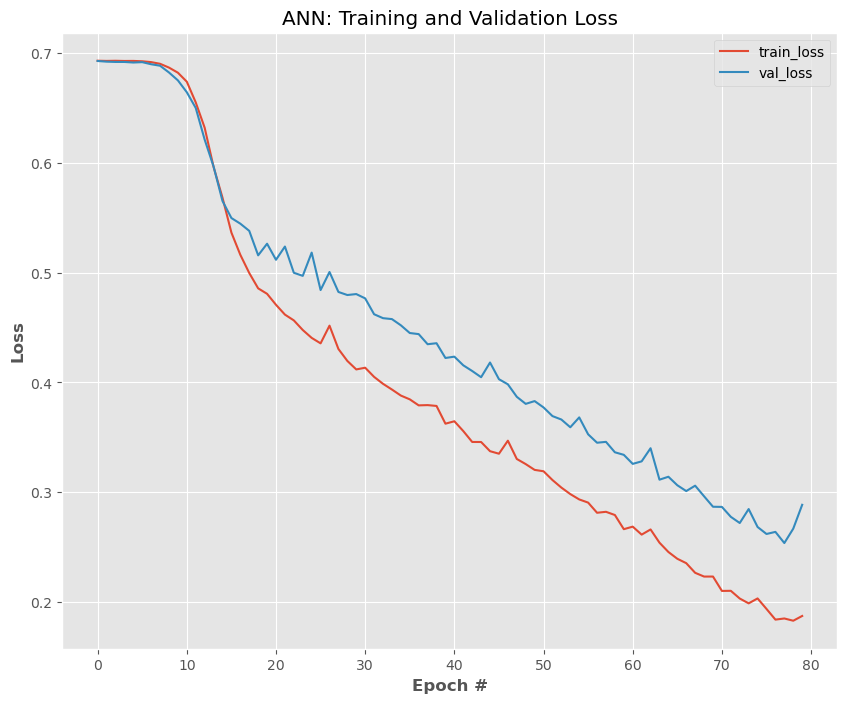

In [141]:
N1= np.arange(0,80)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N1,history1.history['loss'],label='train_loss')
plt.plot(N1,history1.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show()

## Insights: 
- Both the train and validation loss are decreasing with the increasing number of Epochs which is a good model.
- Both the lines are nearby and have less fluctuations

# Training & Validation Accuracy plotted against number of Epochs

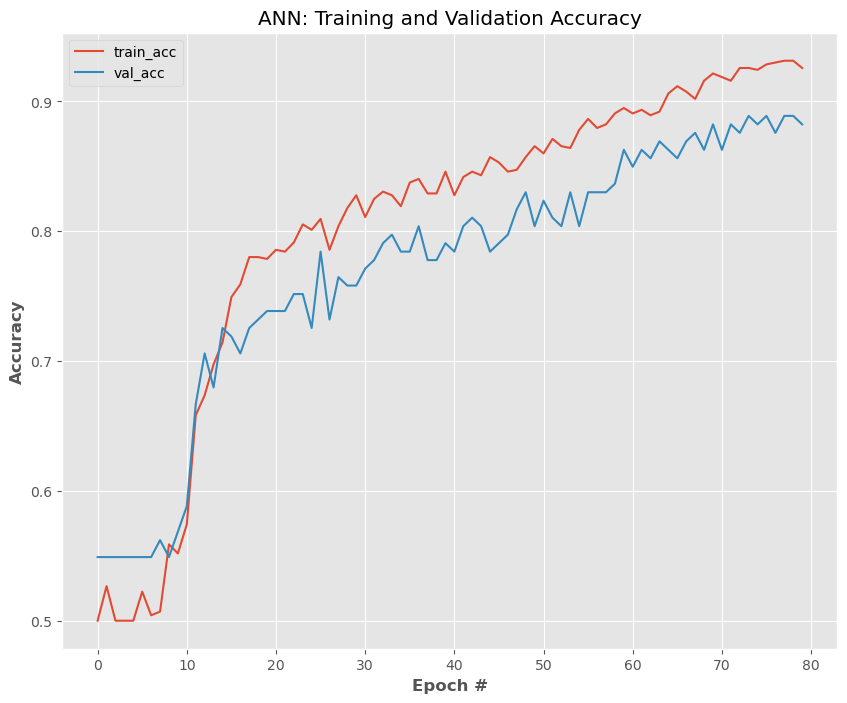

In [143]:
N1= np.arange(0,80)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N1,history1.history['accuracy'],label='train_acc')
plt.plot(N1,history1.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

## Insights: 
- Both the train and validation accuracy are increasing with the increasing number of Epochs which is a good model.
- Both the lines are nearby and have less fluctuations

# Evaluate the model on test data (unseen data)

In [144]:
y_pred1= model1.predict(X_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [145]:
y_pred1

array([[9.64103818e-01],
       [7.81920671e-01],
       [6.90288186e-01],
       [9.70758080e-01],
       [8.22479953e-04],
       [9.79422450e-01],
       [9.67534840e-01],
       [3.92618150e-01],
       [6.84021279e-06],
       [8.39300632e-01],
       [9.58442807e-01],
       [9.59226429e-01],
       [1.01610422e-01],
       [8.48670125e-01],
       [2.09526166e-01],
       [8.28022897e-01],
       [9.36567426e-01],
       [9.76255774e-01],
       [9.86228883e-01],
       [9.73810613e-01],
       [7.87433743e-01],
       [3.43828052e-02],
       [3.39989245e-01],
       [7.51990318e-01],
       [7.83609152e-01],
       [9.87061024e-01],
       [1.36136478e-02],
       [2.13370800e-01],
       [4.59178627e-01],
       [2.54561974e-06],
       [9.77734625e-01],
       [7.78223813e-01],
       [5.11370054e-05],
       [9.95486021e-01],
       [2.05166787e-02],
       [9.80132937e-01],
       [2.64716476e-01],
       [8.70352983e-01],
       [2.41948143e-01],
       [8.32505882e-01],


In [146]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
# Since the output is probabilistic, use a threshold to convert to binary (0 or 1)
y_pred1 = np.round(y_pred1).astype(int)  # Convert to 0s and 1s based on a threshold of 0.5

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)

In [147]:
print(conf_matrix)

[[55 15]
 [ 8 75]]


In [148]:
print(classification_report(y_test1,y_pred1))
 
acc=accuracy_score(y_test1, y_pred1)
print("Accuracy of the model: ",acc)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        70
           1       0.83      0.90      0.87        83

    accuracy                           0.85       153
   macro avg       0.85      0.84      0.85       153
weighted avg       0.85      0.85      0.85       153

Accuracy of the model:  0.8496732026143791


## Insights:
- The model performance has improved afte tunning approaches with a good recall in both the classes and a good accuracy of 84.96% 
- Thus the above tuned model name 'Model1' is the optimal model that can be used for live drowsiness alert.

In [56]:
# Get unique values and their counts
unique_values, counts = np.unique(y1, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1]
Counts: [509 509]


In [ ]:
#equal class distribution in dataset for both classes

In [57]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train1, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1]
Counts: [355 357]


In [92]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train_resampled, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1]
Counts: [357 357]


# Save the model after training

In [149]:
# Save the model after training
model1.save('drowsiness_detection_model.h5')

### Model building completed and saved
### Real Time Drowsiness Alert using Webcam is on file 2